This notebook outlines the basic process for setting up an dowloading data for a simple altimetry project. Data for three example reservoirs in the mekong river basin is used to outline the basic steps necessary to get data simply and quickly. For a more detailed breakdown of how to adjust settings and processing steps see Notebook B.

This example uses the configuration file named "config_A.yaml". Take a look at the file and familiarize yourself with what is inside. Your will need to edit the lines marked "EDIT" to ensure that the notebook runs properly. This lines are mainly detailing the locations to save the project information and raw data and providing your access keys for hydroweb, copernicus and earthacess for data downloads.

In [1]:
# First lets load the needed packages
import yaml
from HydroEO.project import Project

c:\Users\cwch\AppData\Local\miniforge3\envs\rk-altimetry\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First lets inspect the reservoirs and their location for where we would like to download data. We can read in information from the config file or look directly to inspect the reservoirs. Make sure that the path is correct.

In [2]:
path_to_config = r"..\data\config_A.yaml"
with open(path_to_config, "rt") as f:
    config = yaml.safe_load(f.read())

path_to_reservoirs = config["reservoirs"]["path"]
print(f"Path to reservoirs: {path_to_reservoirs}")

Path to reservoirs: C:\Users\cwch\Projects\WR-Collaboration\rk-altimetry\notebooks\example_data\example_res.shp


Now that we are sure we are referencing the right reservoirs for our project we can go ahead and create the altimetry project. We will give it a meaningful name and point to the configuration file.

In [3]:
mekong = Project(name="Mekong", config=path_to_config)
mekong.report()

# We can view an interactive map of the reservoirs by inspecting the geopandas geodataframe attribute
mekong.reservoirs.gdf.explore()

Project Name: Mekong
Number of reservoirs: 1


Once the project is generated and we have ensure the configuration file has been read properly, we can initialize the project. This will ensure that we have all necessary information to begin downloading altimetry data. If downloading SWOT data this step will make sure that the PLD (Prior Lake Database) for the area surrounding the reservoirs is downloaded or properly referenced. The PLD is the reference database used by the SWOT to associate observations to a known waterbody, allowing for a quick reliable water surface elevation timeseries.

In [4]:
mekong.initialize()

PLD located
Out of the 1 reservoirs, 1 are present and 0 are missing from the PLD.


C:\Users\cwch\Projects\WR-Collaboration\rk-altimetry\HydroEO\system.py:619: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  present.to_file(os.path.join(self.dirs["output"], "present_in_pld.shp"))
c:\Users\cwch\AppData\Local\miniforge3\envs\rk-altimetry\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
c:\Users\cwch\AppData\Local\miniforge3\envs\rk-altimetry\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'prior_lake_id' to 'prior_lake'
  ogr_write(
c:\Users\cwch\AppData\Local\miniforge3\envs\rk-altimetry\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'prior_res_id' to 'prior_res_'
  ogr_write(
c:\Users\cwch\AppData\Local\miniforge3\envs\rk-altimetry\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Normalized/laundered field name: 'dist_to_pld' to 'dist_to_pl'
  ogr_write

After initialization, then we are ready to download data for reservoir. Depending on how many reservoirs and products you are downloading as well as the date range, downloads may take a while. If a download stops, you should be able to rerun the command without duplicating downloads. You may iterate here until you have sucessfully downloaded your altimetry data.

In [5]:
mekong.download()

Searching for SWOT_L2_HR_LakeSP_2.0 for aoi from 2023-01-01 to 2024-11-01
1313 products returned from query
438 products of 'Prior' type
438 files shown as downloaded in log
0 will be downloaded


Subsetting files:  54%|█████▍    | 7/13 [00:00<00:00, 62.01it/s]

Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_019_424_AS_20240814T215950_20240814T221237_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_034_AS_20240821T202152_20240821T202824_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_049_AS_20240822T092638_20240822T094049_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_062_AS_20240822T202223_20240822T203104_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_077_AS_20240823T092948_20240823T094020_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_090_AS_20240823T202054_20240823T203215_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_021_077_AS_20240913T061502_20240913T062526_PIC0_01.zip
Unable to unzip: C:\Users\cwch\tem

Subsetting files: 100%|██████████| 13/13 [00:00<00:00, 65.56it/s]

Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_021_133_AS_20240915T061731_20240915T062558_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_021_146_AS_20240915T170703_20240915T172022_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_021_161_AS_20240916T061845_20240916T062650_PIC0_01.zip



Dowloading data for id Nuozhadu:
Searching for Icesat2 ATL13 for aoi from 2019-01-01 to 2024-11-01
Processing Jobid: 6293ea40-48fa-4f9b-b731-d8d1250c0664, please wait...



Job is running with errors.


Job processed, downloading data...


TypeError: object of type 'generator' has no len()

Once the raw data is downloaded we can extract the valid observations, clean the timeseries, and merge different products into a single timeseries all in one command. The different processing steps will be saved for review.

In [6]:
mekong.create_timeseries()

100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


After we have created a merged timeseries, we can investigate the final product, steps and quality of timeseries by generating some summary charts. You can decide whether you wish to save and/or show the figures with the show and save arguments. These figures are generated directly from the saved timeseries. If you wish to remove some data or tailer specific reservoirs to specific processing steps, see the follow up notebook Example_B.ipynb to learn more.

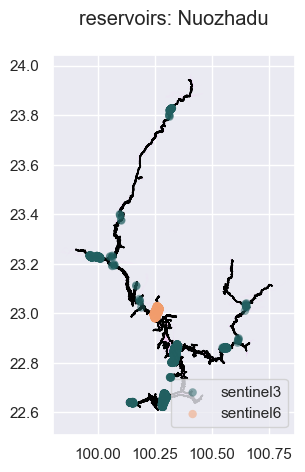

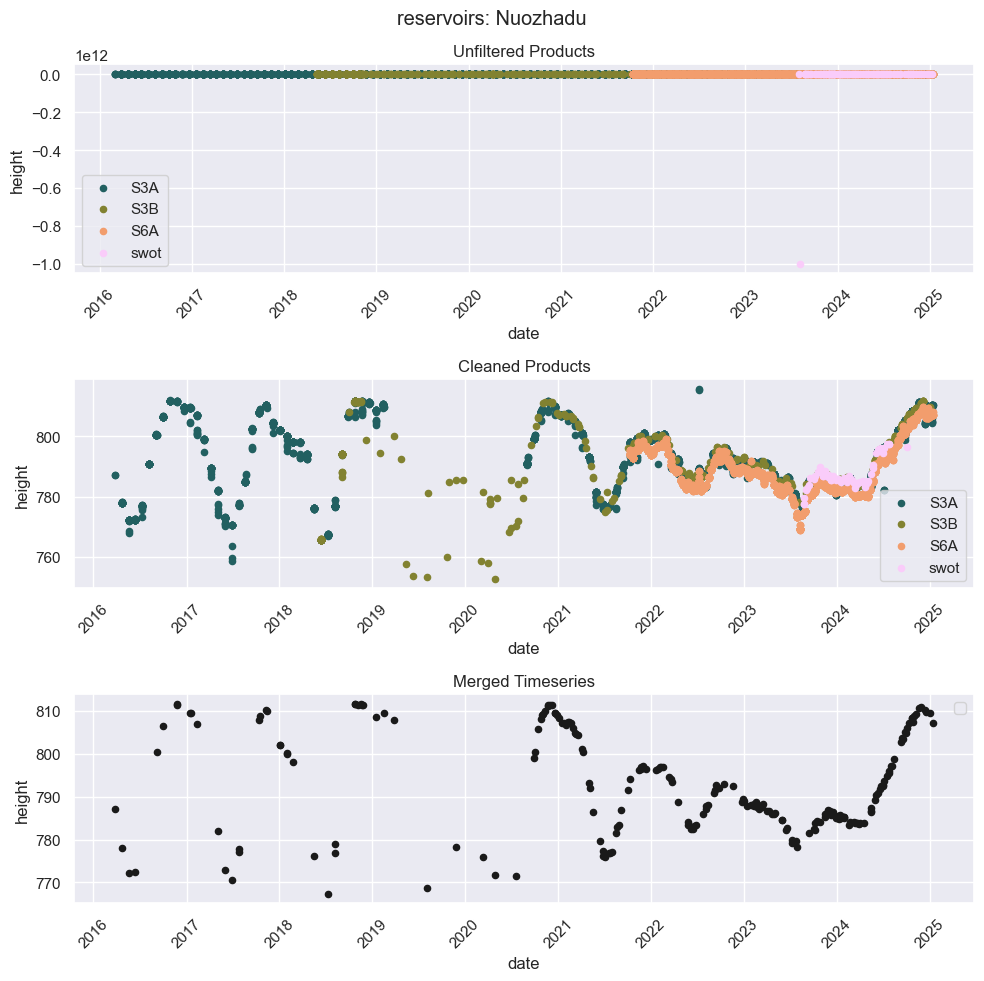

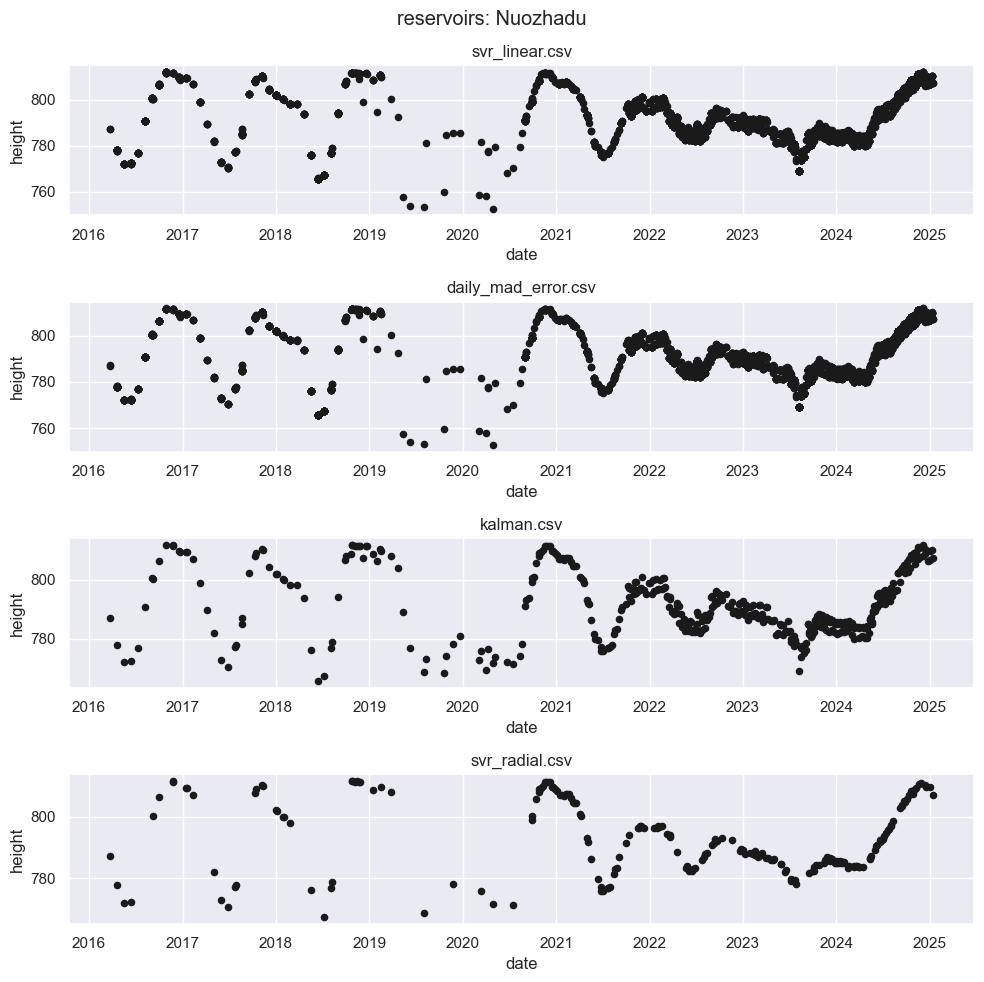

In [7]:
mekong.generate_summaries(show=False, save=False)

We can also update a previously genereated project with any new observations up until present through the update function. This will search for the last available downloaded observation and edit the download dates to update from then to the current date. We need to rerun the processing steps to update the full merged timeseries.

Updating download archives up to 2025-01-14
Updating SWOT Lake SP product
Searching for SWOT_L2_HR_LakeSP_2.0 for aoi from 2025-01-07 to 2025-01-14
9 products returned from query
3 products of 'Prior' type
3 files shown as downloaded in log
0 will be downloaded


Subsetting files: 100%|██████████| 13/13 [00:00<00:00, 111.85it/s]

Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_019_424_AS_20240814T215950_20240814T221237_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_034_AS_20240821T202152_20240821T202824_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_049_AS_20240822T092638_20240822T094049_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_062_AS_20240822T202223_20240822T203104_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_077_AS_20240823T092948_20240823T094020_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_020_090_AS_20240823T202054_20240823T203215_PIC0_01.zip
Unable to unzip: C:\Users\cwch\temp\mekong\swot\reservoirs\SWOT_L2_HR_LakeSP_Prior_021_077_AS_20240913T061502_20240913T062526_PIC0_01.zip
Unable to unzip: C:\Users\cwch\tem

No available granules found
Updating Sentinel-3 Hydro product

Dowloading data for id Nuozhadu:
Searching for Sentinel-S3 for aoi from 2025-01-13 to 2025-01-14
1 products returned by query.
1 products already downloaded.
Generating session token
Session token age: 0.00 minutes


Subsetting data in Nuozhadu:   0%|          | 0/419 [00:00<?, ?file/s]

Updating Sentinel-6 Hydro product

Dowloading data for id Nuozhadu:
Searching for Sentinel-S6 for aoi from 2025-01-13 to 2025-01-14


2 products returned by query.
2 products already downloaded.
Generating session token
Session token age: 0.00 minutes


100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


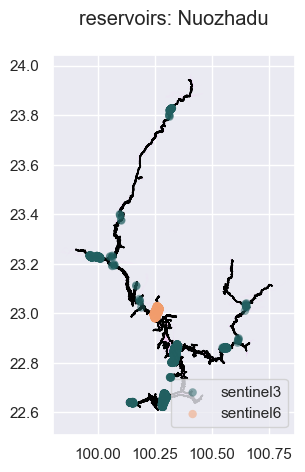

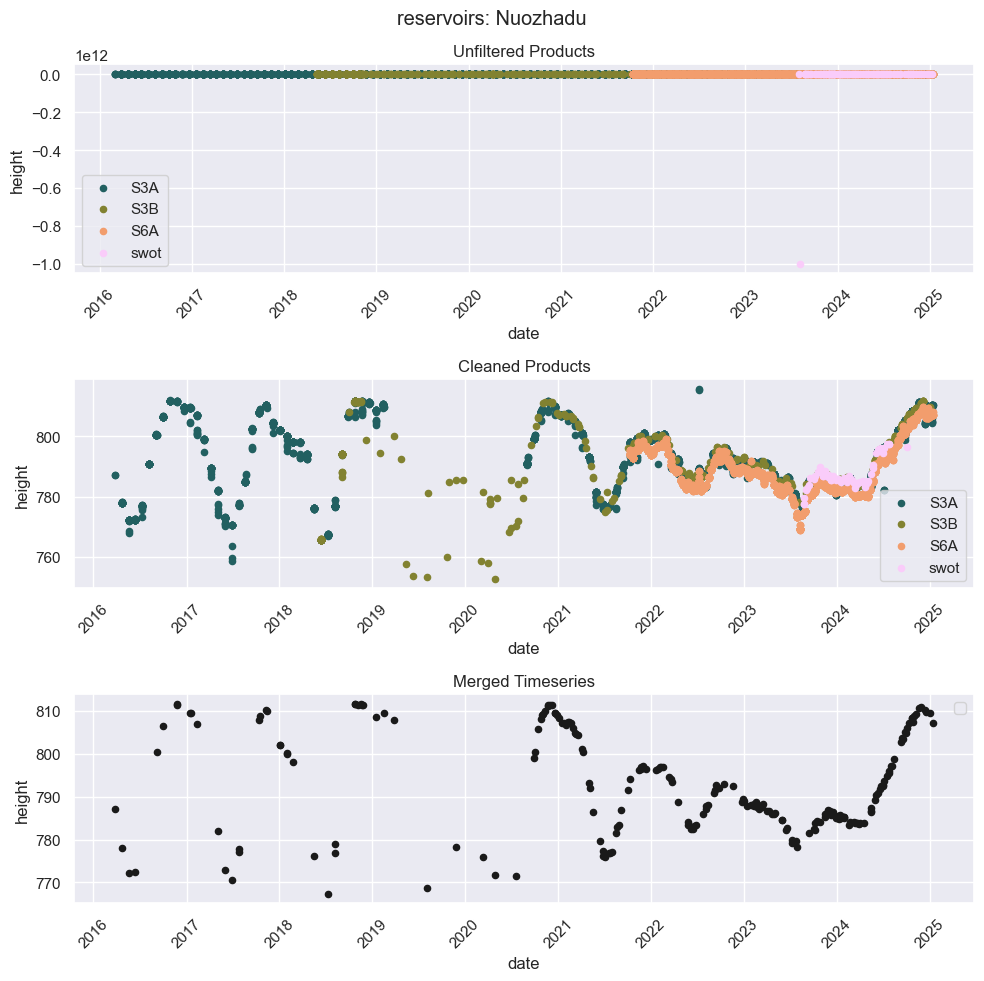

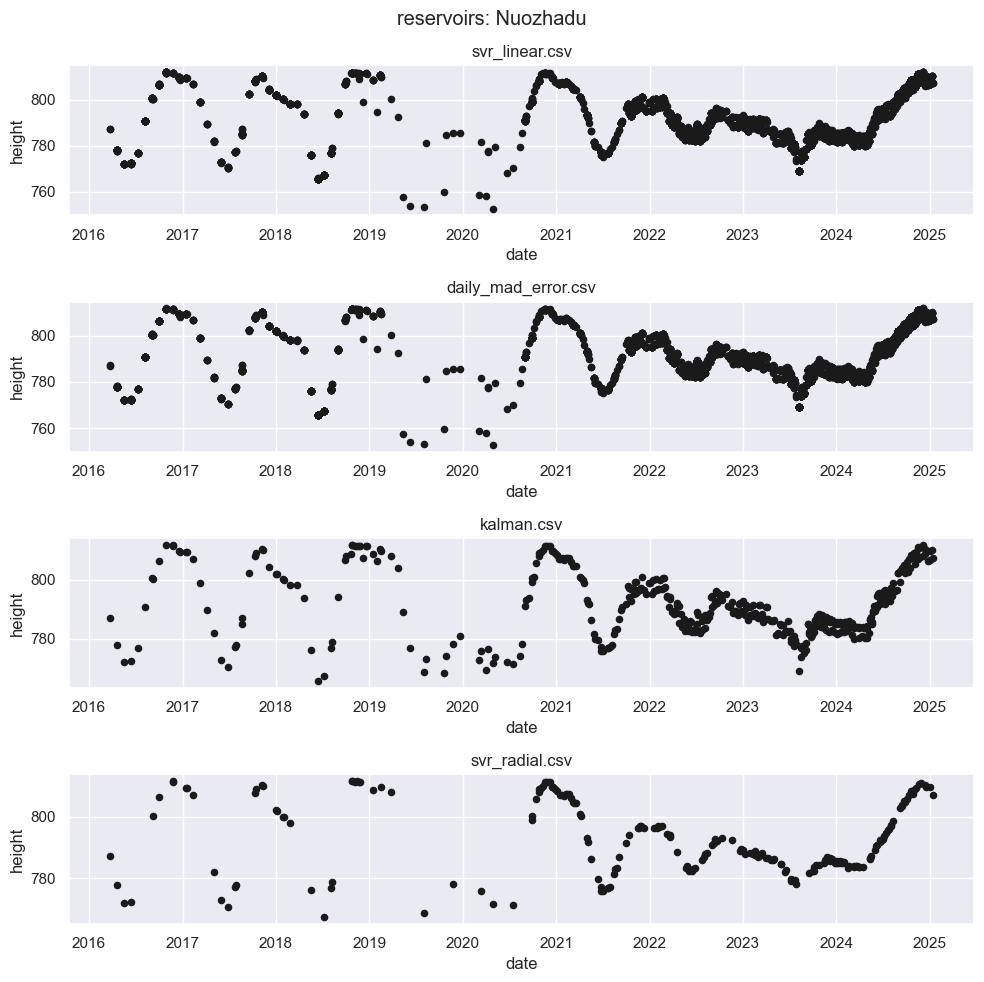

In [8]:
mekong.update()
mekong.create_timeseries()
mekong.generate_summaries(show=False, save=True)

These steps run a single set of processing steps and parameters for each reservoir. Each reservoir will have different available data and lenght of timeseries, meaning that different processing steps may be better for some reservoirs rather than others. If you are interested in learning how to run the workflow at a lower level with more control, see Example_B.ipynb which details the System class utilized by the Project class.